In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, log_loss
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# 1. 데이터 로드 및 준비
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target


In [ ]:
print(f"데이터셋 특성 수: {X.shape[1]}")
print(f"클래스 분포: {np.bincount(y)}")
print("-" * 30)

데이터셋 특성 수: 30
클래스 분포: [212 357]
------------------------------


In [ ]:
# 2. 데이터 분할 (훈련 데이터와 테스트 데이터)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"훈련 데이터 크기: {X_train.shape[0]}")
print(f"테스트 데이터 크기: {X_test.shape[0]}")

훈련 데이터 크기: 398
테스트 데이터 크기: 171


In [ ]:
# 3. 모델 선택 및 훈련

# 로지스틱 회귀 모델 사용
model = LogisticRegression(solver='liblinear', random_state=42) # solver 명시적으로 지정
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
# 4. 예측 (테스트 데이터)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Positive 클래스(1)에 대한 확률


In [ ]:
y_test

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [ ]:
# 5. 평가 지표 계산
y_pred

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [ ]:

# 5-1. 정확도 (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"정확도 (Accuracy): {accuracy:.4f}")

정확도 (Accuracy): 0.9415


In [ ]:
# 5-2. 오차 행렬 (Confusion Matrix)
conf_matrix = confusion_matrix(y_test, y_pred)
print("오차 행렬:\n", conf_matrix)
# TN, FP, FN, TP 순서로 출력 (참고: scikit-learn의 오차 행렬은 [[TN, FP], [FN, TP]] 형태)
tn, fp, fn, tp = conf_matrix.ravel()
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")


오차 행렬:
 [[ 56   8]
 [  2 105]]
TN: 56, FP: 8, FN: 2, TP: 105


In [ ]:
TP = 0
for i in range(len(y_test)):
  if y_test[i] == 1 and 1 == y_pred[i]:
      TP += 1
print(TP)

105


In [ ]:

# 5-3. 정밀도 (Precision)
precision = precision_score(y_test, y_pred)
print(f"정밀도 (Precision): {precision:.4f}")

정밀도 (Precision): 0.9292


In [ ]:

# 5-4. 재현율 (Recall / Sensitivity)
recall = recall_score(y_test, y_pred)
print(f"재현율 (Recall): {recall:.4f}")

재현율 (Recall): 0.9813


In [ ]:

# 5-5. F1 점수 (F1 Score)
f1 = f1_score(y_test, y_pred)
print(f"F1 점수 (F1 Score): {f1:.4f}")

F1 점수 (F1 Score): 0.9545


In [ ]:

# 5-6. ROC AUC 점수
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC 점수: {roc_auc:.4f}")

ROC AUC 점수: 0.9873


In [ ]:

# 5-7. 로그 손실 (Log Loss)
logloss = log_loss(y_test, y_pred_proba)
print(f"로그 손실 (Log Loss): {logloss:.4f}")
print("-" * 30)

로그 손실 (Log Loss): 0.1276
------------------------------


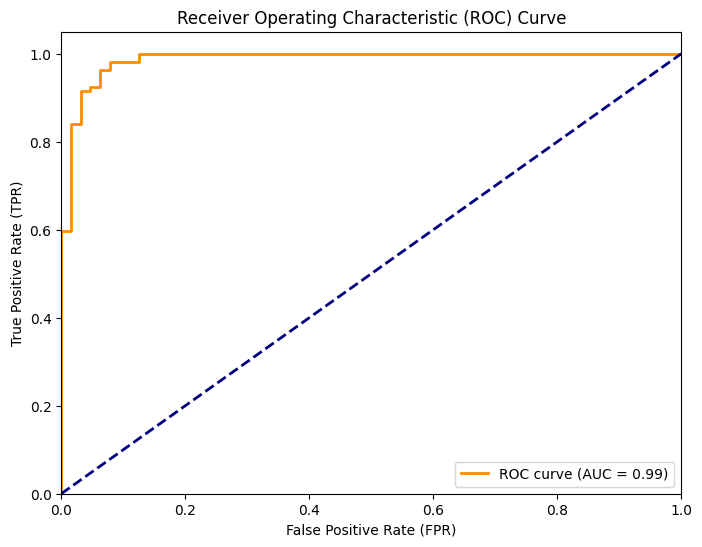

In [ ]:
# 6. ROC 곡선 시각화
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()